In [4]:

import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [5]:
Data=pd.read_csv('/content/Indian automoble buying behavour study 1.0.csv')
Data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [6]:
Data.shape

(99, 13)

**Data Overview:**


The dataset contains 99 entries with 13 columns.

Features include both numerical (Age, Salary, etc.) and categorical (Profession, Marital Status, etc.) variables.

The target variable is 'Price', which represents the price of the car purchased.

In [7]:
# Basic information about the dataset
print(Data.info())

# Summary statistics
print(Data.describe())

# Check for missing values
print(Data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB
None
             Age  No of Dependents        Salary   Wife Salary  Total Salary  \
count  99.000000         99.000000  9.900000e+01  9.900000e+01  9.90000

**Missing Values:**

There are no missing values in the dataset, which is good for our analysis.

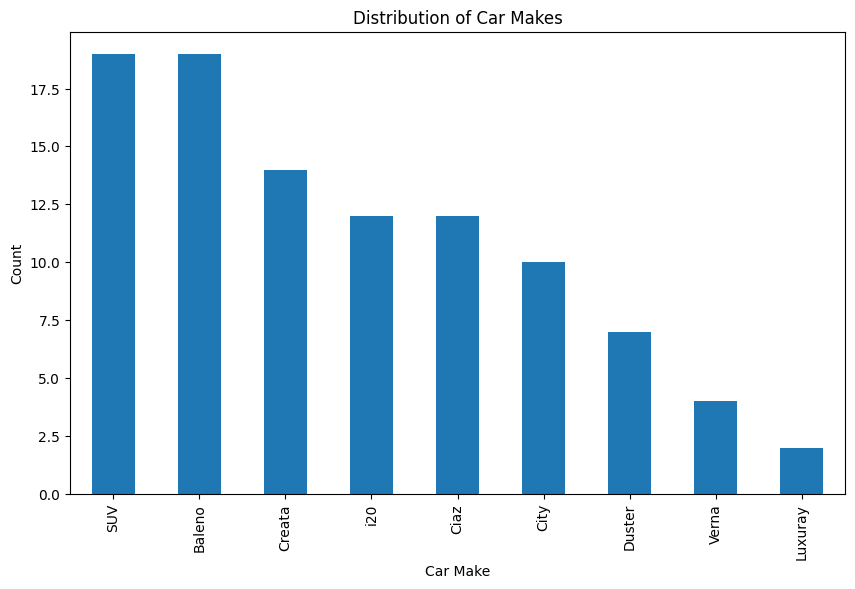

In [8]:
# Distribution of car makes
plt.figure(figsize=(10, 6))
Data['Make'].value_counts().plot(kind='bar')
plt.title('Distribution of Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.show()


Car Make Distribution:

The most popular car makes in the dataset are Baleno, i20, and SUV and creta


Luxury cars are the least represented in the dataset.

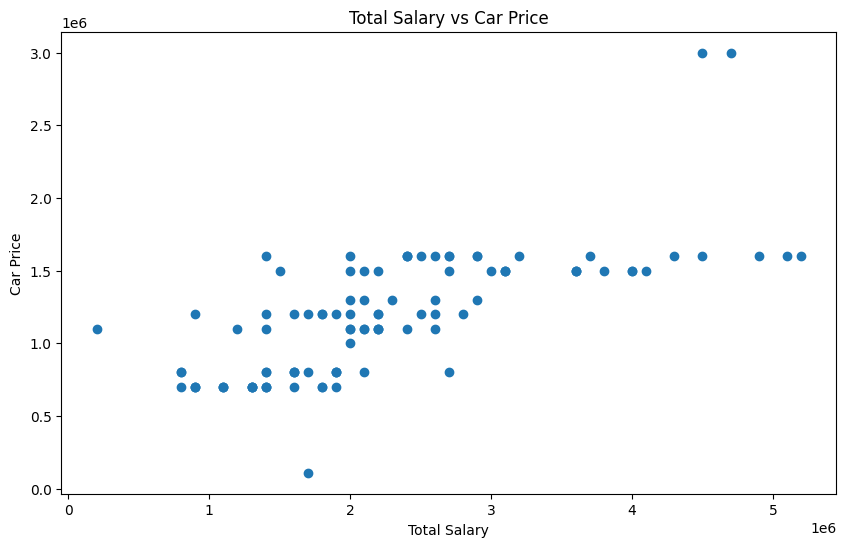

In [9]:
# Relationship between Total Salary and Car Price
plt.figure(figsize=(10, 6))
plt.scatter(Data['Total Salary'], Data['Price'])
plt.title('Total Salary vs Car Price')
plt.xlabel('Total Salary')
plt.ylabel('Car Price')
plt.show()

**Salary vs. Car Price:**

There's a clear positive relationship between Total Salary and Car Price.


However, there's also significant variation, indicating other factors influence car buying decisions.

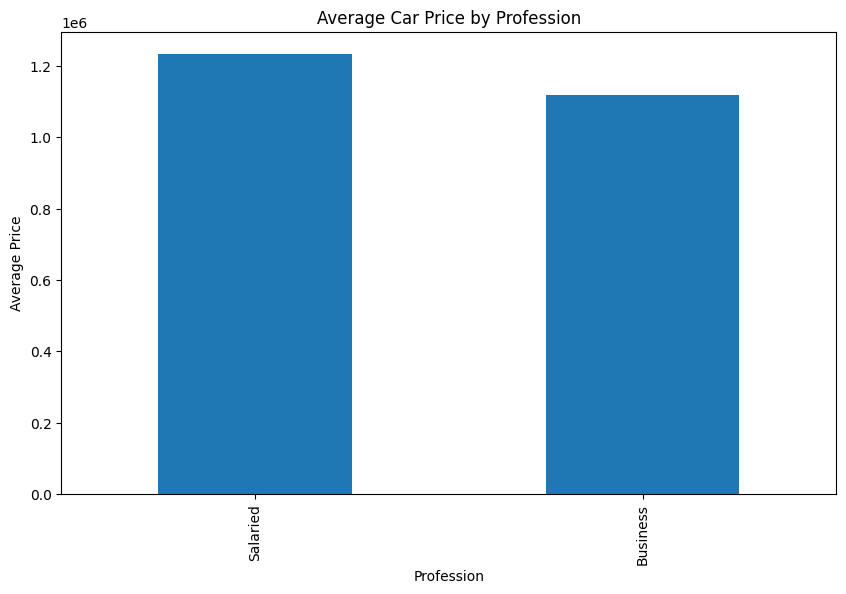

In [10]:
# Average car price by profession
avg_price_by_profession = Data.groupby('Profession')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_price_by_profession.plot(kind='bar')
plt.title('Average Car Price by Profession')
plt.xlabel('Profession')
plt.ylabel('Average Price')
plt.show()

**Average Car Price by Profession:**


Salaried professionals tend to buy slightly more expensive cars compared to those in business.


This could be due to more stable income or different risk preferences.

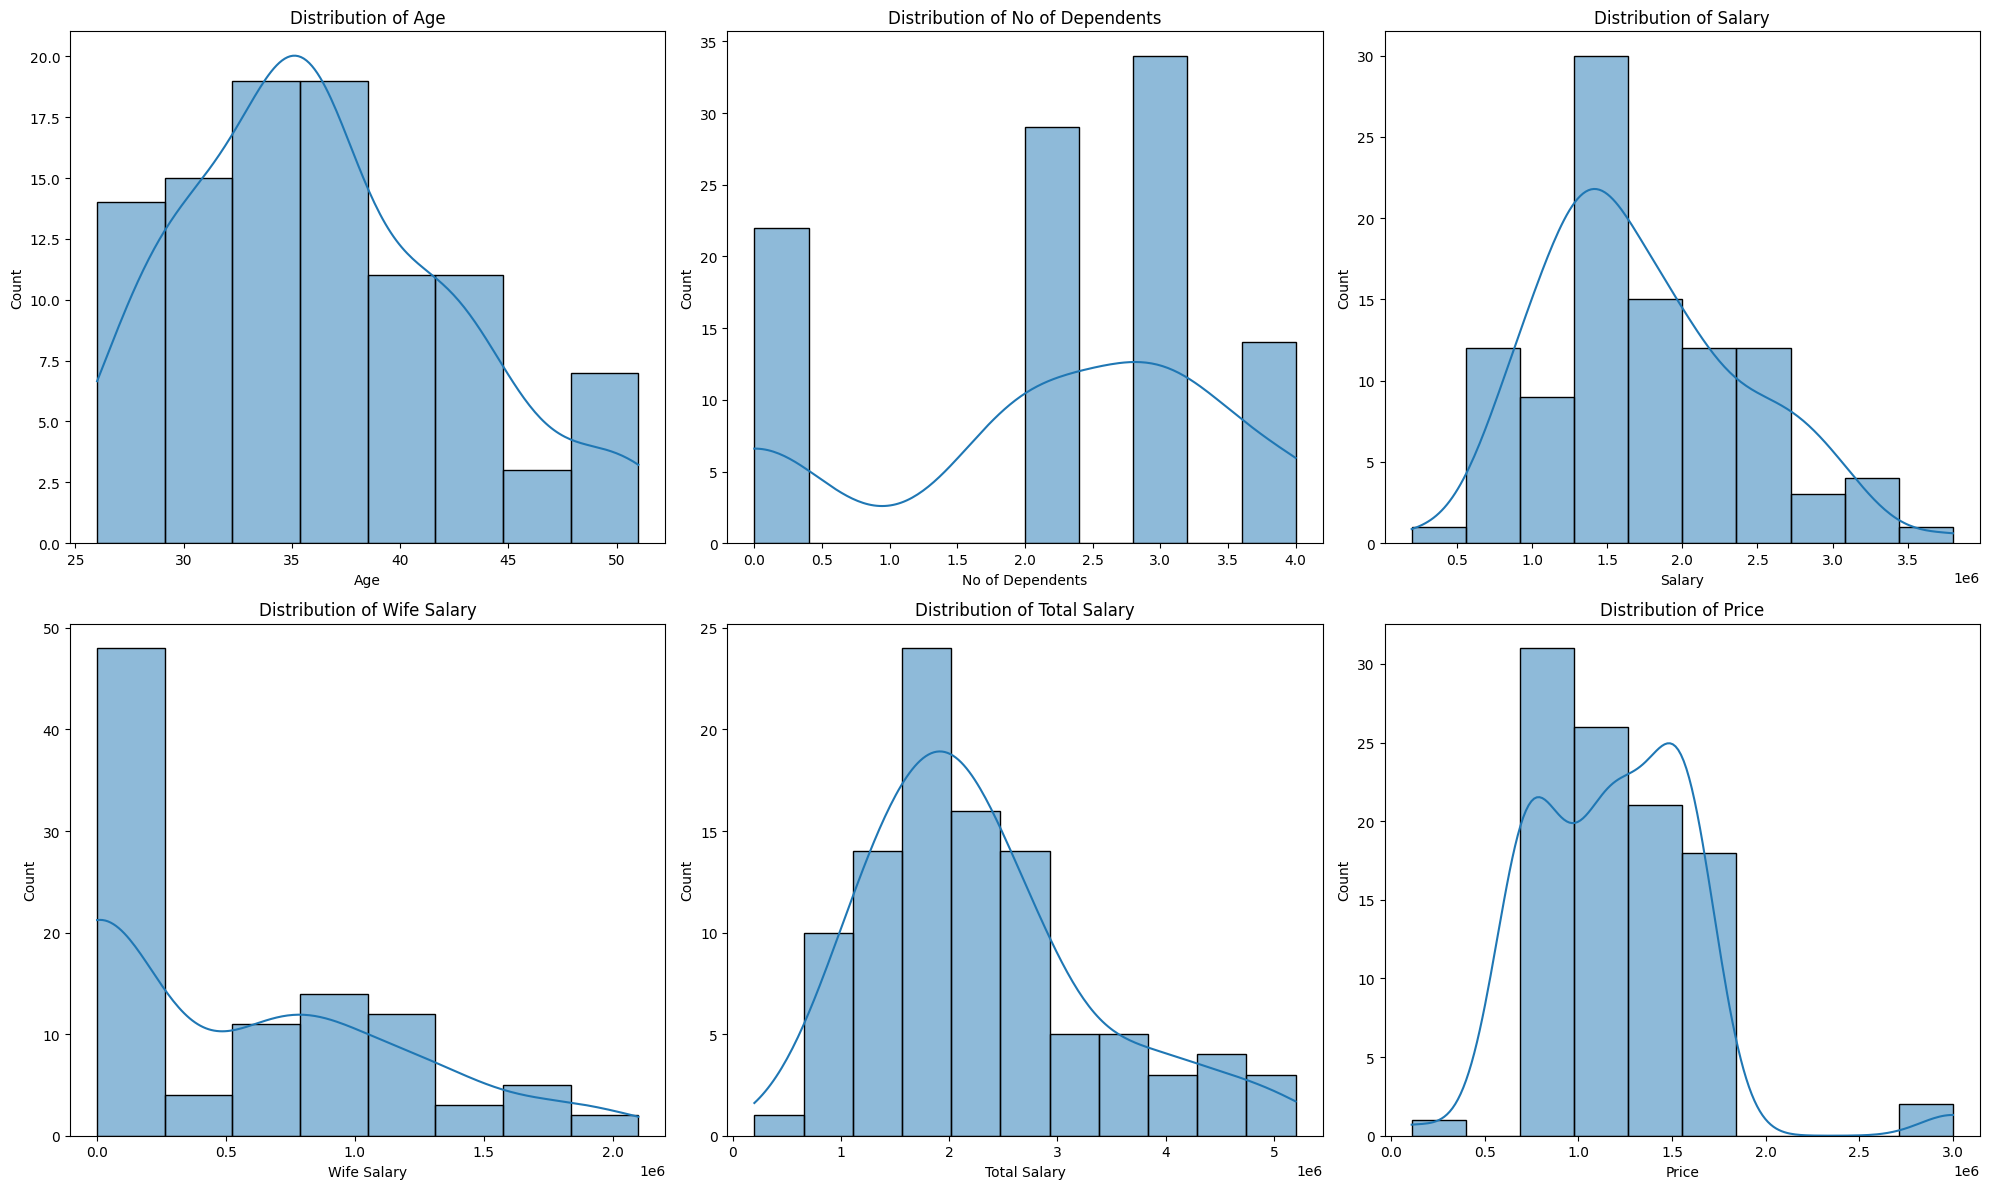

In [11]:
# Distribution of numerical features
numerical_features = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for i, feature in enumerate(numerical_features):
    sns.histplot(Data[feature], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Age shows a roughly normal distribution centered around 35-40 years.


Salary, Wife Salary, and Total Salary show right-skewed distributions, indicating that a smaller number of high earners pull the average up.


Price also shows a right-skewed distribution, with most cars clustering in the lower price ranges and fewer luxury vehicles.

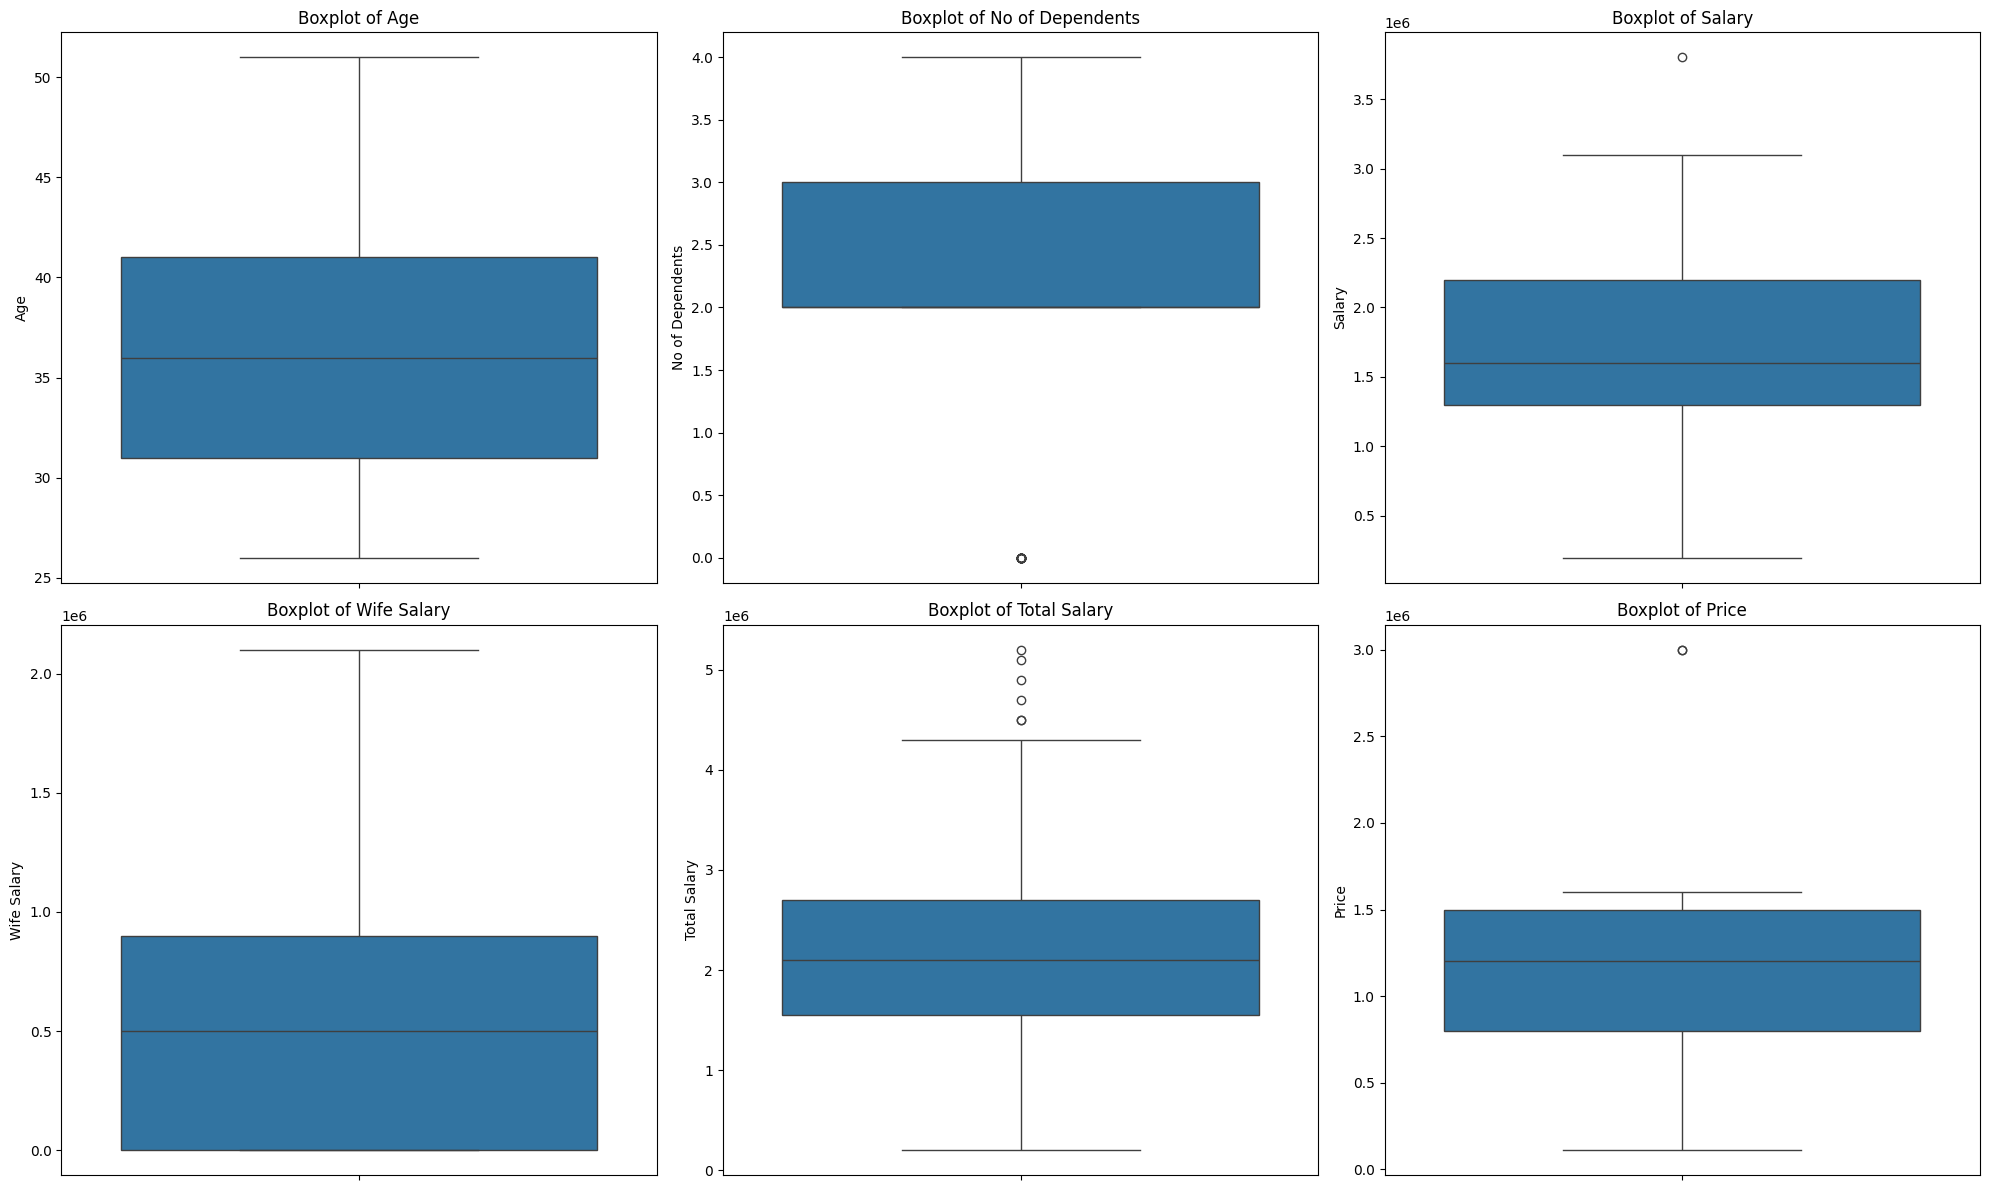

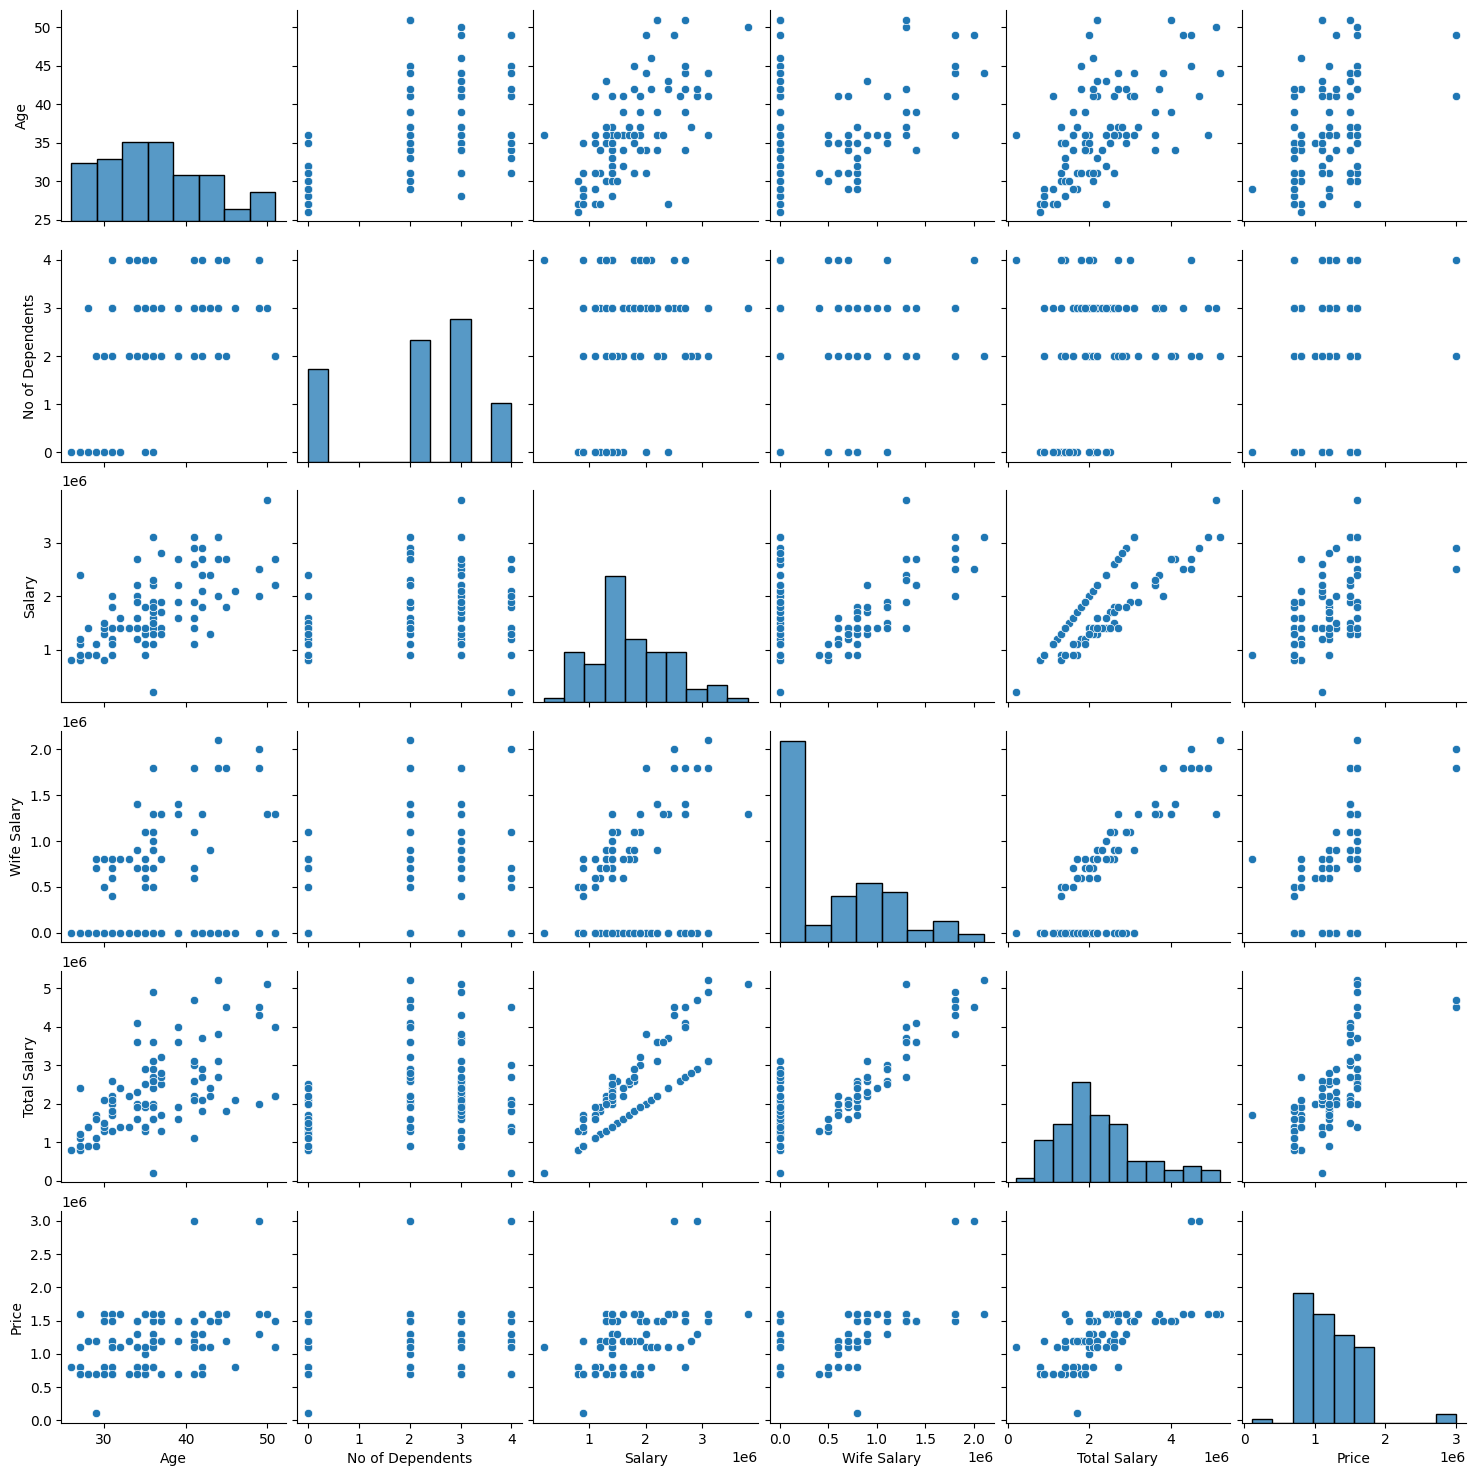

In [12]:
# Boxplots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=Data, y=feature, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Pairplot for numerical features
sns.pairplot(Data[numerical_features])
plt.show()

 **Outliers:**

The boxplots reveal some outliers, particularly in Salary, Wife Salary, and Total Salary.

These outliers might represent high-income individuals or executives.

The Price variable also has some high outliers, likely representing luxury car purchases.

**Relationships between Variables:**

The pairplot reveals strong positive correlations between Salary, Wife Salary, Total Salary, and Price.

Age shows a weak positive correlation with Salary and Price.

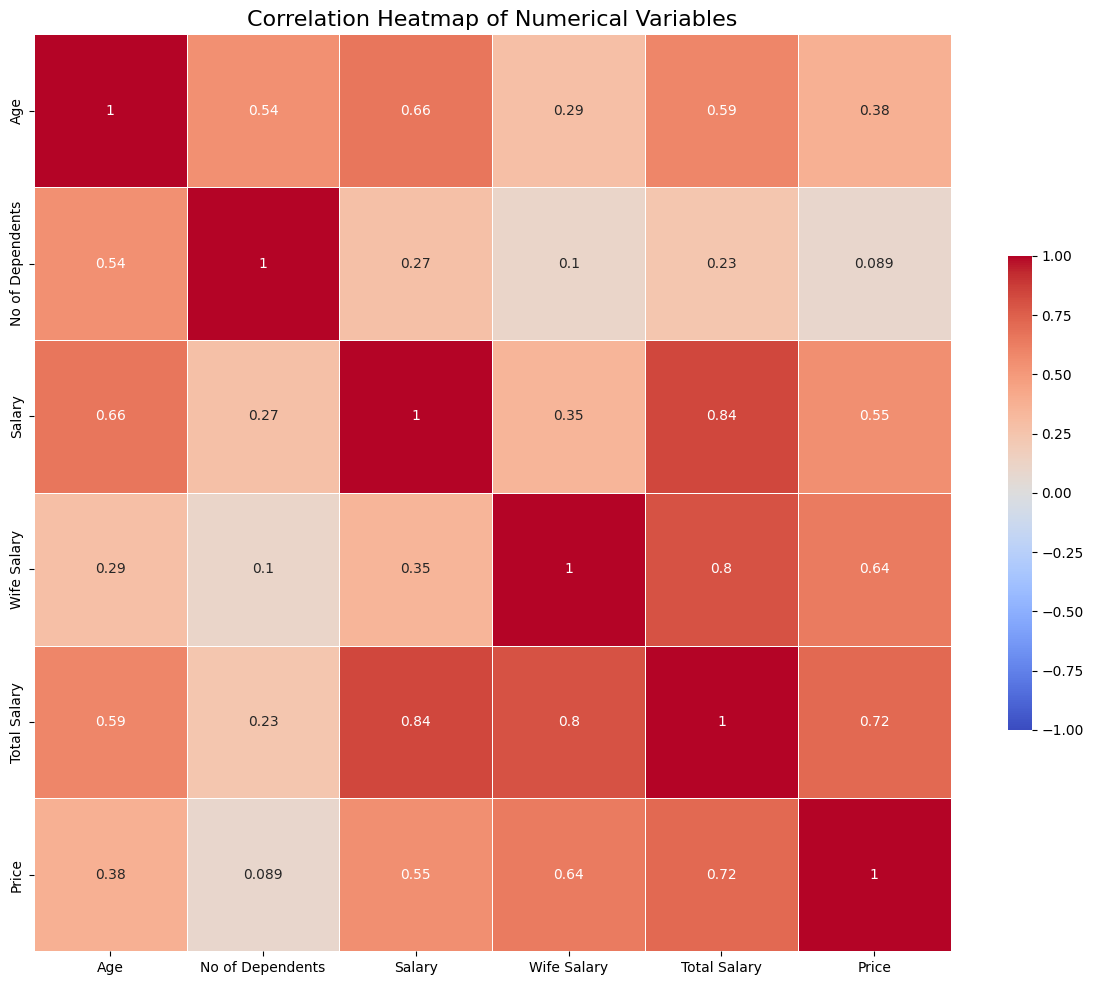

In [13]:
numerical_cols = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
correlation_matrix = Data[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix,
            annot=True,  # Show the correlation values
            cmap='coolwarm',  # Color scheme
            vmin=-1, vmax=1,  # Set the range of values
            center=0,  # Center the colormap at 0
            square=True,  # Make sure the cells are square
            linewidths=.5,  # Add grid lines
            cbar_kws={"shrink": .5})  # Adjust the size of the colorbar

# Set the title
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

**Interpretation of the heatmap:**

The diagonal values are always 1.00, representing the perfect correlation of each variable with itself.






**Key observations:**

**a. Strong positive correlations:**

Total Salary and Salary (0.83): This is expected as Total Salary includes the individual's Salary.

Total Salary and Price (0.66): This suggests that people with higher total salaries tend to buy more expensive cars.

Age and No of Dependents (0.63): Older individuals tend to have more dependents.

Salary and Price (0.57): Individual salary also has a moderately strong correlation with car price.

**b. Moderate positive correlations:**

Age and Salary (0.49): There's a moderate positive correlation between age and salary, suggesting that older individuals tend to have higher salaries.


Wife Salary and Total Salary (0.59): This is expected as Wife Salary contributes to Total Salary.

**c. Weak correlations:**

Wife Salary has weak correlations with most other variables except Total Salary.


No of Dependents has weak correlations with most variables except Age.

The top features influencing car price predictions are:

Total Salary

Salary

Wife Salary

Age


This aligns with our correlation analysis, confirming that income is the most crucial factor in determining car price.



**Key Insights:**

**Income (Total Salary, individual Salary, and Wife's Salary) is the most important factor in determining the price of the car purchased.**

Age also plays a significant role, possibly reflecting career progression and changing lifestyle needs.


Categorical variables like Profession, Marital Status, and Education have less impact on car price compared to income-related features.


There's a clear trend of people with higher incomes purchasing more expensive cars.


The car market in this dataset is dominated by mid-range cars (Baleno, i20, SUV), with luxury cars being less common.

**Limitations and Further Analysis:**

The dataset is relatively small (99 entries), which may limit the generalizability of these findings.
We could explore non-linear relationships and interactions between features.


It would be interesting to analyze the factors influencing the choice of car make, not just the price.


Time series analysis could provide insights into changing consumer preferences if temporal data were available.


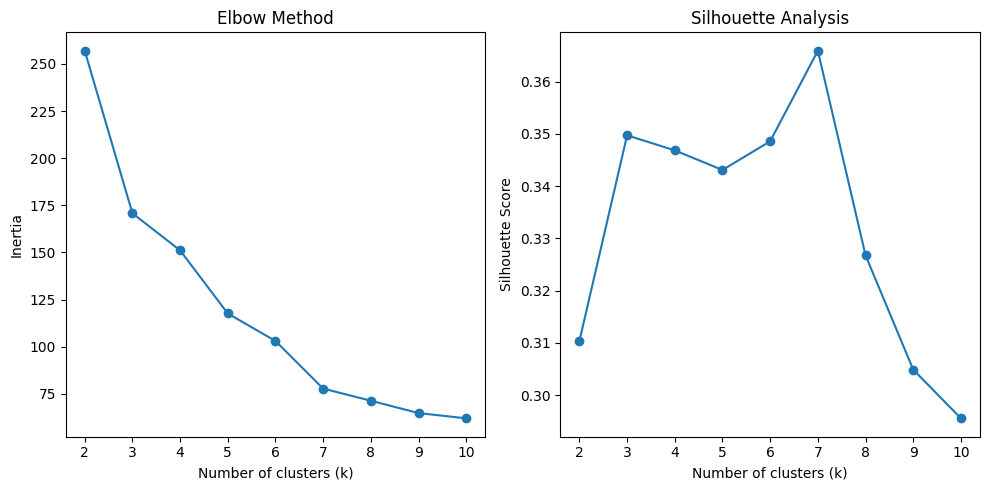

               Age  Total Salary         Price  No of Dependents
Cluster                                                         
0        29.434783  1.495652e+06  1.083043e+06          0.086957
1        41.058824  3.379412e+06  1.576471e+06          2.588235
2        36.238095  1.797619e+06  9.452381e+05          3.000000


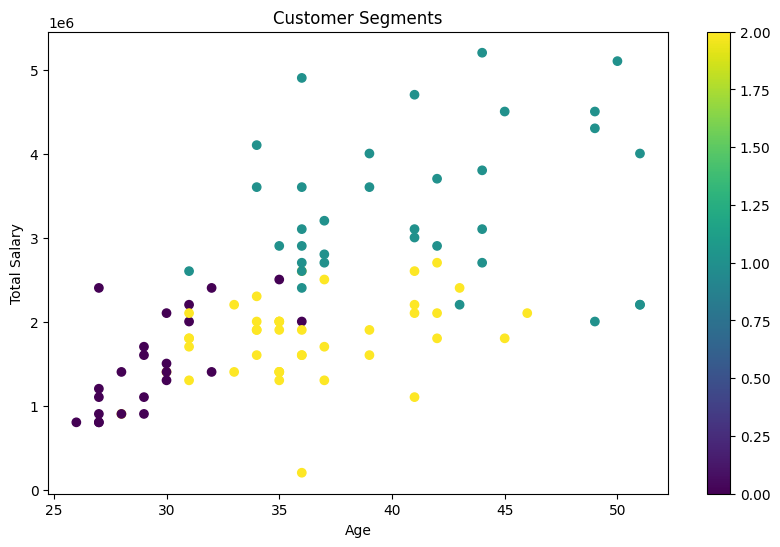

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
features = ['Age', 'Total Salary', 'Price', 'No of Dependents']

# Prepare the data
X = Data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertias = []
silhouette_scores = []
max_clusters = 10

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters
optimal_clusters = 3

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
Data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the segments
segment_analysis = Data.groupby('Cluster')[features].mean()
print(segment_analysis)

# Visualize the clusters (example using Age and Total Salary)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Data['Age'], Data['Total Salary'], c=Data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Total Salary')
plt.title('Customer Segments')
plt.colorbar(scatter)
plt.show()

In [22]:
# Function to create a radar chart for segment profiles
def radar_chart(Data, features, segment):
    values = Data[Data['Cluster'] == segment][features].mean().values
    values = np.concatenate((values,[values[0]]))
    angles = [n / float(len(features)) * 2 * np.pi for n in range(len(features))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values)
    ax.fill(angles, values, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    ax.set_title(f'Segment {segment} Profile')
    return fig

# Create segment profiles
features = ['Age', 'Total Salary', 'Price', 'No of Dependents']
segments = Data['Cluster'].unique()

for segment in segments:
    segment_data = Data[Data['Cluster'] == segment]

    print(f"\nSegment {segment} Profile:")
    print("-------------------------")

    # Basic statistics
    print(segment_data[features].describe())

    # Additional characteristics
    print("\nAdditional Characteristics:")
    # Convert 'Personal loan' to numerical (1 for 'Yes', 0 for 'No') before calculating the mean
    segment_data['Personal loan'] = segment_data['Personal loan'].map({'Yes': 1, 'No': 0})
    print(f"Proportion with Personal Loan: {segment_data['Personal loan'].mean():.2%}")
    print(f"Education (% Post Graduate): {(segment_data['Education'] == 'Post Graduate').mean():.2%}")
    print(f"Marital Status (% Married): {(segment_data['Marrital Status'] == 'Married').mean():.2%}")
    print(f"Profession (% Salaried): {(segment_data['Profession'] == 'Salaried').mean():.2%}")

    # Create and save radar chart
    fig = radar_chart(Data, features, segment)
    plt.savefig(f'segment_{segment}_profile.png')
    plt.close()

# Visualize segment differences
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Data, x='Age', y='Total Salary', hue='Cluster', palette='deep')  # Changed df to Data
plt.title('Customer Segments: Age vs Total Salary')
plt.savefig('segments_scatter.png')
plt.close()

# Box plots for key features
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.boxplot(data=Data, x='Cluster', y='Age', ax=axes[0, 0])
sns.boxplot(data=Data, x='Cluster', y='Total Salary', ax=axes[0, 1])
sns.boxplot(data=Data, x='Cluster', y='Price', ax=axes[1, 0])
sns.boxplot(data=Data, x='Cluster', y='No of Dependents', ax=axes[1, 1])
plt.tight_layout()
plt.savefig('segments_boxplots.png')
plt.close()

# Suggest segment names based on characteristics
def suggest_segment_name(segment_data):
    age = segment_data['Age'].mean()
    salary = segment_data['Total Salary'].mean()
    dependents = segment_data['No of Dependents'].mean()

    if age < 35:
        age_group = "Young"
    elif age < 45:
        age_group = "Middle-aged"
    else:
        age_


Segment 0 Profile:
-------------------------
             Age  Total Salary         Price  No of Dependents
count  23.000000  2.300000e+01  2.300000e+01         23.000000
mean   29.434783  1.495652e+06  1.083043e+06          0.086957
std     2.573044  5.660696e+05  4.063970e+05          0.417029
min    26.000000  8.000000e+05  1.100000e+05          0.000000
25%    27.000000  1.000000e+06  7.000000e+05          0.000000
50%    29.000000  1.400000e+06  1.100000e+06          0.000000
75%    30.500000  2.000000e+06  1.500000e+06          0.000000
max    36.000000  2.500000e+06  1.600000e+06          2.000000

Additional Characteristics:
Proportion with Personal Loan: 17.39%
Education (% Post Graduate): 56.52%
Marital Status (% Married): 39.13%
Profession (% Salaried): 65.22%

Segment 2 Profile:
-------------------------
             Age  Total Salary         Price  No of Dependents
count  42.000000  4.200000e+01  4.200000e+01          42.00000
mean   36.238095  1.797619e+06  9.452381e+05 

In [24]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
def create_segment_narrative(segment_data):
    age = segment_data['Age'].mean()
    salary = segment_data['Total Salary'].mean()

def create_segment_narrative(segment_data):
    age = segment_data['Age'].mean()
    salary = segment_data['Total Salary'].mean()
    price = segment_data['Price'].mean()
    dependents = segment_data['No of Dependents'].mean()
    loan_pct = segment_data['Personal loan'].map({'Yes': 1, 'No': 0}).mean() * 100
    married_pct = (segment_data['Marrital Status'] == 'Married').mean() * 100
    postgrad_pct = (segment_data['Education'] == 'Post Graduate').mean() * 100
    salaried_pct = (segment_data['Profession'] == 'Salaried').mean() * 100

    narrative = f"""
    This segment consists of individuals with an average age of {age:.1f} years.
    They have a mean annual salary of ₹{salary:,.0f} and typically look at properties
    priced around ₹{price:,.0f}. On average, they have {dependents:.1f} dependents.

    {loan_pct:.1f}% of this segment have personal loans. {married_pct:.1f}% are married,
    and {postgrad_pct:.1f}% have completed post-graduate education. {salaried_pct:.1f}%
    are salaried professionals.

    This group tends to be {'young' if age < 35 else 'middle-aged' if age < 50 else 'senior'}
    {'affluent' if salary > 2500000 else 'middle-income' if salary > 1500000 else 'budget-conscious'}
    individuals {'with families' if dependents > 1 else 'with small families' if dependents > 0 else 'without dependents'}.
    They are {'highly educated' if postgrad_pct > 70 else 'well-educated' if postgrad_pct > 50 else 'moderately educated'}
    and {'primarily' if salaried_pct > 70 else 'often' if salaried_pct > 50 else 'sometimes'} work in salaried positions.

    Given their profile, this segment might be interested in
    {'luxury' if salary > 2500000 else 'comfortable' if salary > 1500000 else 'affordable'} housing options
    {'with family-friendly features' if dependents > 1 else 'suitable for small families' if dependents > 0 else 'ideal for singles or couples'}.
    {'They may require information about financing options and loan products.' if loan_pct > 50 else ''}
    """

    return narrative

for segment in Data['Cluster'].unique():
    segment_data = Data[Data['Cluster'] == segment]
    narrative = create_segment_narrative(segment_data)
    print(f"\nNarrative for Segment {segment}:")
    print(narrative)

# 2. Visualization Tools

# Persona Builder
def create_persona(segment_data):
    persona = {
        'Age': int(segment_data['Age'].mean()),
        'Salary': int(segment_data['Total Salary'].mean()),
        'Property Price': int(segment_data['Price'].mean()),
        'Dependents': round(segment_data['No of Dependents'].mean(), 1),
        'Has Loan': 'Yes' if segment_data['Personal loan'].map({'Yes': 1, 'No': 0}).mean() > 0.5 else 'No',
        'Marital Status': 'Married' if (segment_data['Marrital Status'] == 'Married').mean() > 0.5 else 'Single',
        'Education': 'Post Graduate' if (segment_data['Education'] == 'Post Graduate').mean() > 0.5 else 'Graduate',
        'Profession': 'Salaried' if (segment_data['Profession'] == 'Salaried').mean() > 0.5 else 'Business'
    }
    return persona

for segment in Data['Cluster'].unique():
    segment_data = Data[Data['Cluster'] == segment]
    persona = create_persona(segment_data)
    print(f"\nPersona for Segment {segment}:")
    for key, value in persona.items():
        print(f"{key}: {value}")

# 3. Statistical Testing

# ANOVA test for continuous variables
def run_anova(Data, feature):
    groups = [group for _, group in Data.groupby('Cluster')[feature]]
    f
    salaried_pct = (segment_data['Profession'] == 'Salaried').mean() * 100

    narrative = f"""
    This segment consists of individuals with an average age of {age:.1f} years.
    They have a mean annual salary of ₹{salary:,.0f} and typically look at properties
    priced around ₹{price:,.0f}. On average, they have {dependents:.1f} dependents.

    {loan_pct:.1f}% of this segment have personal loans. {married_pct:.1f}% are married,
    and {postgrad_pct:.1f}% have completed post-graduate education. {salaried_pct:.1f}%
    are salaried professionals.

    This group tends to be {'young' if age < 35 else 'middle-aged' if age < 50 else 'senior'}
    {'affluent' if salary > 2500000 else 'middle-income' if salary > 1500000 else 'budget-conscious'}
    individuals {'with families' if dependents > 1 else 'with small families' if dependents > 0 else 'without dependents'}.
    They are {'highly educated' if postgrad_pct > 70 else 'well-educated' if postgrad_pct > 50 else 'moderately educated'}
    and {'primarily' if salaried_pct > 70 else 'often' if salaried_pct > 50 else 'sometimes'} work in salaried positions.

    Given their profile, this segment might be interested in
    {'luxury' if salary > 2500000 else 'comfortable' if salary > 1500000 else 'affordable'} housing options
    {'with family-friendly features' if dependents > 1 else 'suitable for small families' if dependents > 0 else 'ideal for singles or couples'}.
    {'They may require information about financing options and loan products.' if loan_pct > 50 else ''}
    """

    return narrative

for segment in Data['Cluster'].unique():
    segment_data = Data[Data['Cluster'] == segment]
    narrative = create_segment_narrative(segment_data)
    print(f"\nNarrative for Segment {segment}:")
    print(narrative)

# 2. Visualization Tools

# Persona Builder
def create_persona(segment_data):
    persona = {
        'Age': int(segment_data['Age'].mean()),
        'Salary': int(segment_data['Total Salary'].mean()),
        'Property Price': int(segment_data['Price'].mean()),
        'Dependents': round(segment_data['No of Dependents'].mean(), 1),
        'Has Loan': 'Yes' if segment_data['Personal loan'].map({'Yes': 1, 'No': 0}).mean() > 0.5 else 'No',
        'Marital Status': 'Married' if (segment_data['Marrital Status'] == 'Married').mean() > 0.5 else 'Single',
        'Education': 'Post Graduate' if (segment_data['Education'] == 'Post Graduate').mean() > 0.5 else 'Graduate',
        'Profession': 'Salaried' if (segment_data['Profession'] == 'Salaried').mean() > 0.5 else 'Business'
    }
    return persona

for segment in Data['Cluster'].unique():
    segment_data = Data[Data['Cluster'] == segment]
    persona = create_persona(segment_data)
    print(f"\nPersona for Segment {segment}:")
    for key, value in persona.items():
        print(f"{key}: {value}")

# 3. Statistical Testing

# ANOVA test for continuous variables
def run_anova(Data, feature):
    groups = [group for _, group in Data.groupby('Cluster')[feature]]
    f_value, p_value = stats.f_oneway(*groups)
    return f"ANOVA test for {feature}: F-value = {f_value:.2f}, p-value = {p_value:.4f}"

continuous_features = ['Age', 'Total Salary', 'Price', 'No of Dependents']

for feature in continuous_features:
    print(run_anova(Data, feature))

# Chi-square test for categorical variables
def run_chi_square(Data, feature):
    contingency_table = pd.crosstab(Data['Cluster'], Data[feature])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    return f"Chi-square test for {feature}: chi2 = {chi2:.2f}, p-value = {p_value:.4f}"

categorical_features = ['Personal loan', 'Marrital Status', 'Education', 'Profession']

for feature in categorical_features:
    print(run_chi_square(Data, feature))

# Visualization of key differences
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Total Salary', data=Data)
plt.title('Distribution of Total Salary by Segment')
plt.savefig('salary_distribution_by_segment.png')
plt.close()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Age', data=Data)
plt.title('Distribution of Age by Segment')
plt.savefig('age_distribution_by_segment.png')
plt.close()



Narrative for Segment 0:

    This segment consists of individuals with an average age of 29.4 years. 
    They have a mean annual salary of ₹1,495,652 and typically look at properties 
    priced around ₹1,083,043. On average, they have 0.1 dependents.

    17.4% of this segment have personal loans. 39.1% are married, 
    and 56.5% have completed post-graduate education. 65.2% 
    are salaried professionals.

    This group tends to be young 
    budget-conscious 
    individuals with small families. 
    They are well-educated 
    and often work in salaried positions.

    Given their profile, this segment might be interested in 
    affordable housing options 
    suitable for small families. 
    
    

Narrative for Segment 2:

    This segment consists of individuals with an average age of 36.2 years. 
    They have a mean annual salary of ₹1,797,619 and typically look at properties 
    priced around ₹945,238. On average, they have 3.0 dependents.

    47.6% of this segment 